# TP - Master I3D - Algorithme kmeans mars 2022

In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from skimage.transform import hough_line, hough_line_peaks
from skimage.draw import line
from skimage.color import rgb2gray
from matplotlib import cm

Création des jeux de données avec 2 (ou 3) caractéristiques et n échantillons
utiliser la fonction 
    make_blobs
par exemple
Samples, groupes = make_blobs(options)

Samples définit les échantillons et groupes est juste utilisé pour aider à la visualisation 
options (voir énoncé du TP) ou sklearn.datasets.make_blobs (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html)

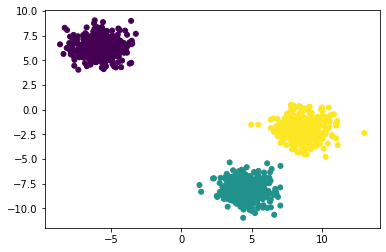

In [155]:
nb_samples = 1000 #Nb samples
nb_features = 3 #Nb caractéristiques
v_clusters = 1.
Samples, groupes = make_blobs(nb_samples,nb_features,centers=3,cluster_std=v_clusters)  # à compléter + plot
plt.figure()
plt.scatter(Samples[:, 0], Samples[:, 1],c=groupes, s=25); # s = size of dots

Apprentissage kmeans
 - choix de la méthode Kmeans avec les paramètres (voir énoncé TP)
 - application Method.fit sur mon jeu de donnée
 - application XXX.predit sur le modèle généré par Method.fit sur mon jeu de données ou nouveau jeu de données à créer./
 - visualisation

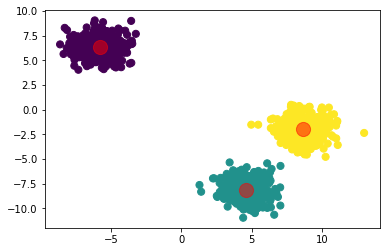

In [156]:
nb_clusters = 3
Method= KMeans(n_clusters=nb_clusters)  # à compléter 
kmeans=Method.fit(Samples)
pred = kmeans.predict(Samples)

#Visualisation des clusters + centre des clusters (fonction kmeans.cluster_centers_)
plt.scatter(Samples[:, 0], Samples[:, 1], c=pred, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

Elbow Method

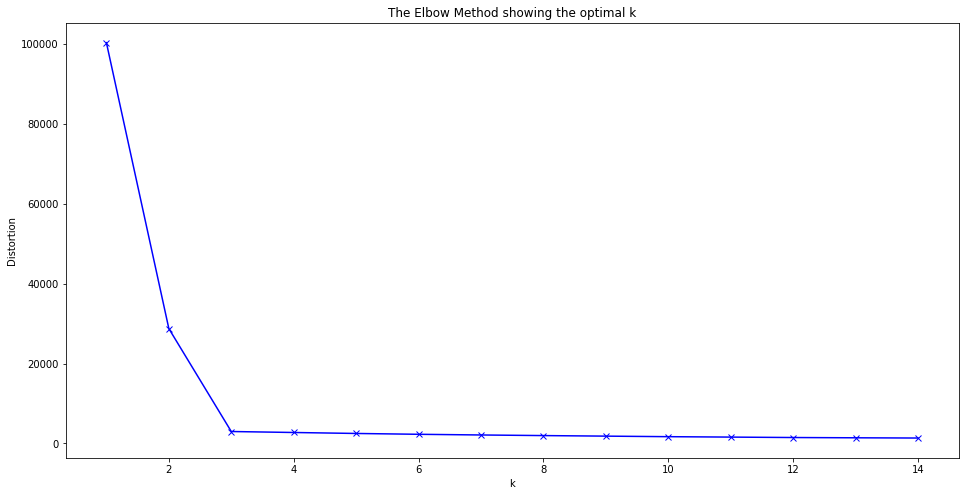

In [157]:
d = []
K = range(1,15)
for k in K:
    kmean = KMeans(n_clusters=k)
    kmean.fit(Samples)
    d.append(kmean.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, d, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## Transformée de Hough

AttributeError: 'AxesSubplot' object has no attribute 'axline'

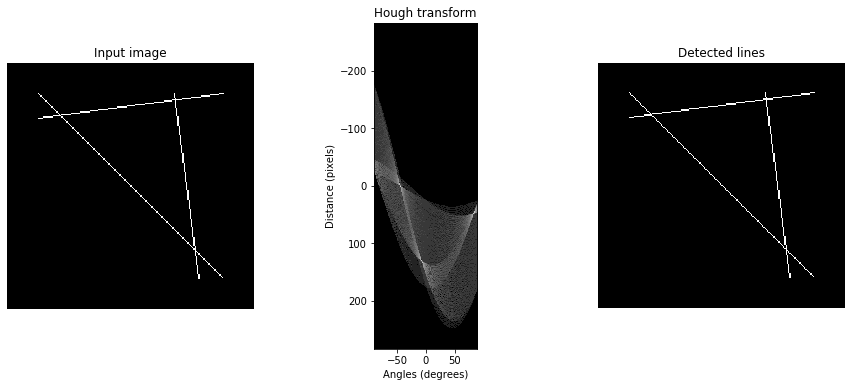

In [186]:
import numpy as np

from skimage.transform import hough_line, hough_line_peaks
from skimage.feature import canny
from skimage.draw import line
from skimage import data

import matplotlib.pyplot as plt
from matplotlib import cm


# Constructing test image
image = np.zeros((200, 200))
idx = np.arange(25, 175)
image[idx, idx] = 255
image[line(45, 25, 25, 175)] = 255
image[line(25, 135, 175, 155)] = 255

# Classic straight-line Hough transform
# Set a precision of 0.5 degree.
tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 360, endpoint=False)
h, theta, d = hough_line(image, theta=tested_angles)

# Generating figure 1
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
ax = axes.ravel()

ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input image')
ax[0].set_axis_off()

angle_step = 0.5 * np.diff(theta).mean()
d_step = 0.5 * np.diff(d).mean()
bounds = [np.rad2deg(theta[0] - angle_step),
          np.rad2deg(theta[-1] + angle_step),
          d[-1] + d_step, d[0] - d_step]
ax[1].imshow(np.log(1 + h), extent=bounds, cmap=cm.gray, aspect=1 / 1.5)
ax[1].set_title('Hough transform')
ax[1].set_xlabel('Angles (degrees)')
ax[1].set_ylabel('Distance (pixels)')
ax[1].axis('image')

ax[2].imshow(image, cmap=cm.gray)
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title('Detected lines')

for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    (x0, y0) = dist * np.array([np.cos(angle), np.sin(angle)])
    ax[2].axline((x0, y0), slope=np.tan(angle + np.pi/2))

plt.tight_layout()
plt.show()

AttributeError: 'AxesSubplot' object has no attribute 'axline'

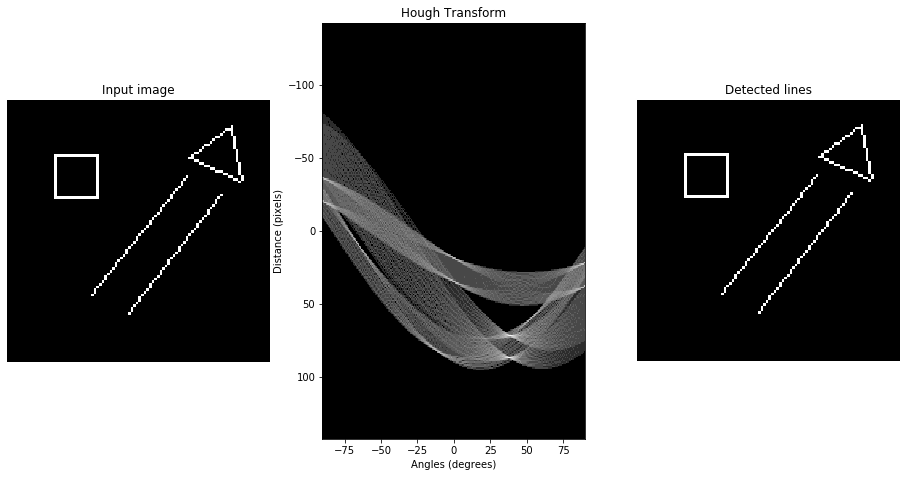

In [183]:
image = rgb2gray(plt.imread("Images/Polygones.png"))

tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 360, endpoint=False)
h, theta, d = hough_line(image, theta=tested_angles)
# h = Hough space
# theta = angles at which the transform is computed, in radians.
# d = distances


fig, axes = plt.subplots(1, 3,figsize=(16,9))
ax = axes.ravel()

# Display input image
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Input image')
ax[0].set_axis_off()

# Display Hough Transform

angle_step = 0.5 * np.diff(theta).mean()
d_step = 0.5 * np.diff(d).mean()
bounds = [np.rad2deg(theta[0] - angle_step),
          np.rad2deg(theta[-1] + angle_step),
          d[-1] + d_step, d[0] - d_step]
ax[1].imshow(np.log(1 + h), extent=bounds, cmap='gray', aspect=1 / 1.5)

ax[1].set_title('Hough Transform')
ax[1].set_xlabel('Angles (degrees)')
ax[1].set_ylabel('Distance (pixels)')
ax[1].axis('image')

ax[2].imshow(image, cmap='gray')
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title('Detected lines')

for _, angle, dist in zip(*hough_line_peaks(h, theta, d,threshold=5,num_peaks=9)):
    (x0, y0) = dist * np.array([np.cos(angle), np.sin(angle)])
    ax[2].axline((x0, y0), slope=np.tan(angle + np.pi/2))
plt.tight_layout()
plt.show()
